<a href="https://colab.research.google.com/github/dayaiit/test/blob/main/L1_MML_Cv1_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathematics for Machine Learning: Vectors

This notebook provides interactive demonstrations of vector concepts and their applications in machine learning.

## 1. Introduction to Vectors in Python

In this section, we'll explore how to create and manipulate vectors in Python using NumPy, the fundamental library for numerical computing.

Remember, vectors are just ordered lists of numbers that have special operations defined on them. In ML, vectors are everywhere:
- Each data point is a vector
- Features form vectors
- Model parameters are stored as vectors
- Predictions are often vectors

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Set visualization style
# plt.style.use('seaborn-whitegrid') # This line caused the error
plt.style.use('seaborn-v0_8-whitegrid')  # Use the correct style name from Seaborn
sns.set_context("notebook", font_scale=1.5)

### Creating Vectors in Python

In Python, we typically use NumPy arrays to represent vectors. Let's create some example vectors:

In [2]:
# Create vectors using NumPy
v = np.array([2, 5, 1])  # 3D vector
w = np.array([3, -2, 4])  # Another 3D vector

# Print the vectors
print("Vector v:", v)
print("Vector w:", w)
print("\nType of v:", type(v))
print("Shape of v:", v.shape)
print("Dimension of v:", v.ndim)  # Note: ndim refers to the dimensions of the array, not the vector
print("Length of v:", len(v))  # This gives the number of elements (i.e., the dimension of the vector)

Vector v: [2 5 1]
Vector w: [ 3 -2  4]

Type of v: <class 'numpy.ndarray'>
Shape of v: (3,)
Dimension of v: 1
Length of v: 3


### Real-World Example: Student Performance Vector

Let's create a more concrete example: representing student performance as vectors.

In [3]:
# Create vectors for student performance [quiz_score, homework_score, project_score, attendance, participation]
student1 = np.array([85, 92, 78, 95, 88])
student2 = np.array([75, 85, 92, 70, 95])

print("Student 1 performance:", student1)
print("Student 2 performance:", student2)

# Create a student dataframe for better visualization
categories = ['Quiz', 'Homework', 'Project', 'Attendance', 'Participation']
students_df = pd.DataFrame({
    'Category': categories,
    'Student 1': student1,
    'Student 2': student2
})

students_df

Student 1 performance: [85 92 78 95 88]
Student 2 performance: [75 85 92 70 95]


,Category,Student 1,Student 2
0,Quiz,85,75
1,Homework,92,85
2,Project,78,92
3,Attendance,95,70
4,Participation,88,95


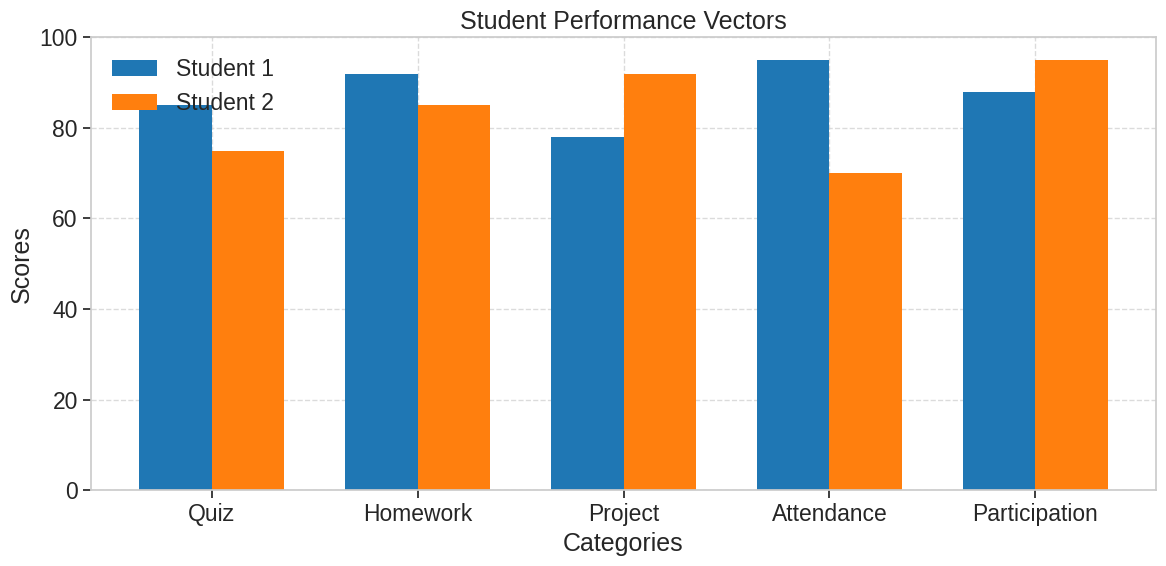

In [4]:
# Visualize student performance as bar charts
plt.figure(figsize=(12, 6))
x = np.arange(len(categories))
width = 0.35

plt.bar(x - width/2, student1, width, label='Student 1')
plt.bar(x + width/2, student2, width, label='Student 2')

plt.xlabel('Categories')
plt.ylabel('Scores')
plt.title('Student Performance Vectors')
plt.xticks(x, categories)
plt.ylim(0, 100)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 2. Basic Vector Operations

Now let's implement the basic vector operations we discussed in class:
- Vector addition
- Scalar multiplication
- Vector subtraction

In [ ]:
# Create our example vectors again
v = np.array([2, 5, 1])
w = np.array([3, -2, 4])
c = 3  # A scalar

# Vector addition
addition = v + w
print("v + w =", addition)

# Scalar multiplication
scalar_mult = c * v
print("c * v =", scalar_mult)

# Vector subtraction
subtraction = v - w
print("v - w =", subtraction)

# More complex operation
complex_op = 2*v - 3*w
print("2v - 3w =", complex_op)

v + w = [5 3 5]
c * v = [ 6 15  3]
v - w = [-1  7 -3]
2v - 3w = [ -5  16 -10]


### Visualizing Vector Operations in 2D

Let's visualize these operations for better understanding. We'll use 2D vectors for easy plotting.

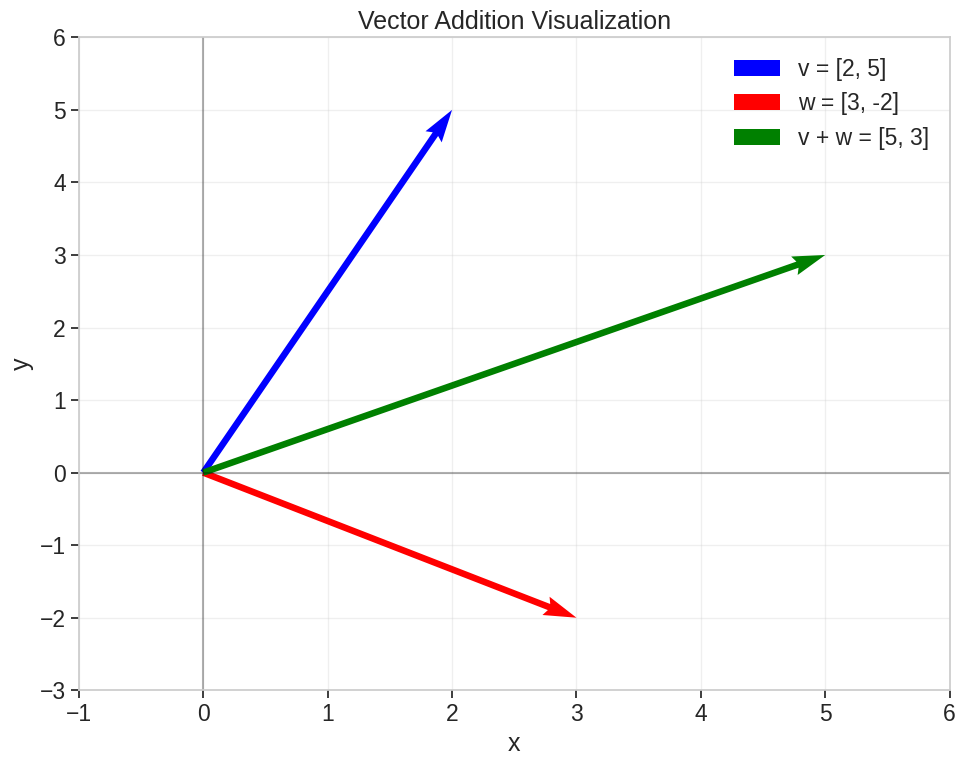

In [ ]:
# Create 2D vectors for visualization
v_2d = np.array([2, 5])
w_2d = np.array([3, -2])
sum_2d = v_2d + w_2d

# Function to draw a vector from origin
def draw_vector(vector, color='blue', label=None):
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)

# Plot the vectors
plt.figure(figsize=(10, 8))

# Draw grid
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(alpha=0.3)

# Draw vectors
draw_vector(v_2d, 'blue', 'v = [2, 5]')
draw_vector(w_2d, 'red', 'w = [3, -2]')
draw_vector(sum_2d, 'green', 'v + w = [5, 3]')

# Set plot limits and labels
plt.xlim(-1, 6)
plt.ylim(-3, 6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vector Addition Visualization')
plt.legend()

plt.tight_layout()
plt.show()

## 3. Dot Products and Vector Similarity

The dot product is one of the most important operations in ML. It measures the alignment between vectors and is the foundation of many algorithms.

In [ ]:
# Using our 3D vectors
v = np.array([2, 5, 1])
w = np.array([3, -2, 4])

# Calculate dot product manually
dot_product_manual = v[0]*w[0] + v[1]*w[1] + v[2]*w[2]
print("Dot product (calculated manually):", dot_product_manual)

# Calculate dot product using NumPy
dot_product_numpy = np.dot(v, w)
print("Dot product (using np.dot):", dot_product_numpy)

# Alternative ways to calculate dot product
dot_product_alt = v @ w  # Using Python's @ operator for matrix multiplication
print("Dot product (using @ operator):", dot_product_alt)

Dot product (calculated manually): 0
Dot product (using np.dot): 0
Dot product (using @ operator): 0


### Vector Similarity with Cosine Similarity

The dot product is related to cosine similarity, which is widely used in ML for measuring the similarity between vectors regardless of their magnitude.

Cosine similarity = (v·w) / (||v|| × ||w||)

In [ ]:
# Calculate vector norms (magnitudes)
v_norm = np.linalg.norm(v)
w_norm = np.linalg.norm(w)

# Calculate cosine similarity
cosine_sim = np.dot(v, w) / (v_norm * w_norm)
print("Cosine similarity between v and w:", cosine_sim)

# Calculate the angle between the vectors (in degrees)
angle_radians = np.arccos(cosine_sim)
angle_degrees = np.degrees(angle_radians)
print("Angle between v and w:", angle_degrees, "degrees")

# Interpret the cosine similarity
if cosine_sim > 0.9:
    print("Vectors are very similar (pointing in nearly the same direction)")
elif cosine_sim > 0:
    print("Vectors are somewhat similar (angle less than 90 degrees)")
elif cosine_sim == 0:
    print("Vectors are perpendicular (90 degrees)")
else:
    print("Vectors are dissimilar (angle more than 90 degrees)")

Cosine similarity between v and w: 0.0
Angle between v and w: 90.0 degrees
Vectors are perpendicular (90 degrees)


### Creating Perpendicular Vectors

Let's find a vector that's perpendicular to v. Remember, perpendicular vectors have a dot product of 0.

In [ ]:
# Original vector
v = np.array([2, 5, 1])

# Create a perpendicular vector
# For a 3D vector [a,b,c], one perpendicular vector could be [b, -a, 0]
perp_v = np.array([v[1], -v[0], 0])

# Check if they're perpendicular (dot product should be 0)
dot_product = np.dot(v, perp_v)
print("Dot product of v and perpendicular vector:", dot_product)
print("Are the vectors perpendicular? ", abs(dot_product) < 1e-10)  # Allow for floating-point error

# Another approach for 3D vectors: cross product gives a vector perpendicular to both input vectors
# We need another vector to perform the cross product
arbitrary_vector = np.array([1, 0, 0])  # Let's use the x-axis unit vector
if np.all(v == arbitrary_vector) or np.all(v == -arbitrary_vector):
    arbitrary_vector = np.array([0, 1, 0])  # Use y-axis if v is aligned with x-axis

# Compute the cross product
cross_perp = np.cross(v, arbitrary_vector)

# Normalize it
if np.linalg.norm(cross_perp) > 0:
    cross_perp = cross_perp / np.linalg.norm(cross_perp)

print("\nAnother perpendicular vector (using cross product):", cross_perp)
print("Dot product with original vector:", np.dot(v, cross_perp))
print("Are the vectors perpendicular? ", abs(np.dot(v, cross_perp)) < 1e-10)

Dot product of v and perpendicular vector: 0
Are the vectors perpendicular?  True

Another perpendicular vector (using cross product): [ 0.          0.19611614 -0.98058068]
Dot product with original vector: 0.0
Are the vectors perpendicular?  True


## 4. Vector Norms and Normalization

The norm of a vector measures its length or magnitude. There are different types of norms, but the most common is the L2 norm (Euclidean norm).

Normalization is the process of scaling a vector to have a unit norm (length of 1), creating a unit vector that preserves the direction.

In [ ]:
# Our example vector
v = np.array([3, 4])

# Calculate the L2 norm (Euclidean norm)
v_norm_manual = np.sqrt(np.sum(v**2))  # sqrt(3² + 4²) = sqrt(9 + 16) = sqrt(25) = 5
print("L2 norm (calculated manually):", v_norm_manual)

# Using NumPy's built-in function
v_norm_numpy = np.linalg.norm(v)
print("L2 norm (using np.linalg.norm):", v_norm_numpy)

# Normalize the vector to create a unit vector
v_unit = v / v_norm_numpy
print("\nOriginal vector:", v)
print("Unit vector (normalized):", v_unit)

# Verify that the unit vector has a norm of 1
print("Norm of the unit vector:", np.linalg.norm(v_unit))

# Other types of norms
# L1 norm (Manhattan distance) - sum of absolute values
v_l1_norm = np.sum(np.abs(v))
print("\nL1 norm (Manhattan):", v_l1_norm)

# L-infinity norm - maximum absolute value
v_linf_norm = np.max(np.abs(v))
print("L-infinity norm (max absolute value):", v_linf_norm)

L2 norm (calculated manually): 5.0
L2 norm (using np.linalg.norm): 5.0

Original vector: [3 4]
Unit vector (normalized): [0.6 0.8]
Norm of the unit vector: 1.0

L1 norm (Manhattan): 7
L-infinity norm (max absolute value): 4


### Visualizing Vector Normalization

Let's visualize the original vector and its normalized (unit) version to better understand normalization.

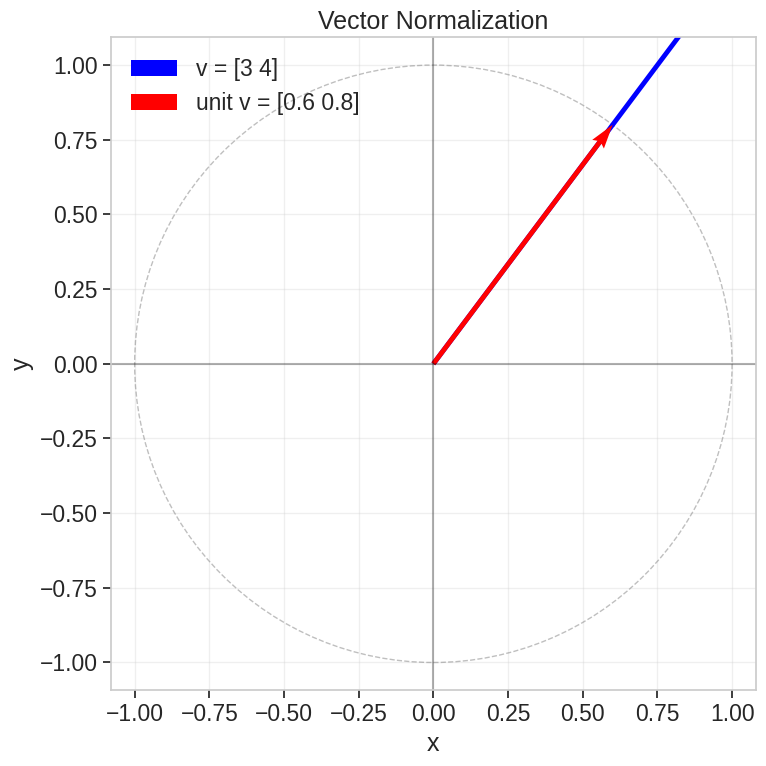

In [ ]:
# Create vectors for visualization
v = np.array([3, 4])
v_unit = v / np.linalg.norm(v)

# Plot the vectors
plt.figure(figsize=(8, 8))

# Draw grid and axes
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(alpha=0.3)

# Draw unit circle
circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--', alpha=0.5)
plt.gca().add_patch(circle)

# Draw vectors
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='blue', label=f'v = {v}')
plt.quiver(0, 0, v_unit[0], v_unit[1], angles='xy', scale_units='xy', scale=1, color='red', label=f'unit v = {v_unit}')

# Set plot limits and labels
plt.xlim(-1.5, 4)
plt.ylim(-1.5, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vector Normalization')
plt.legend()
plt.axis('equal')  # Equal aspect ratio

plt.tight_layout()
plt.show()

### Vector Distance

The distance between two vectors is the norm of their difference.

In [ ]:
# Define two vectors
v = np.array([1, 2, 3])
w = np.array([4, 2, 1])

# Calculate Euclidean distance (L2 norm of the difference)
distance = np.linalg.norm(v - w)
print("Euclidean distance between v and w:", distance)

# Step-by-step calculation
diff = v - w
print("Difference vector (v - w):", diff)
print("Square of each component:", diff**2)
print("Sum of squares:", np.sum(diff**2))
print("Square root of sum of squares (distance):", np.sqrt(np.sum(diff**2)))

# Other distance metrics
manhattan_distance = np.sum(np.abs(v - w))  # L1 norm
print("\nManhattan distance (L1 norm):", manhattan_distance)

# Maximum distance (L-infinity norm)
max_distance = np.max(np.abs(v - w))
print("Maximum component-wise distance (L-infinity norm):", max_distance)

Euclidean distance between v and w: 3.605551275463989
Difference vector (v - w): [-3  0  2]
Square of each component: [9 0 4]
Sum of squares: 13
Square root of sum of squares (distance): 3.605551275463989

Manhattan distance (L1 norm): 5
Maximum component-wise distance (L-infinity norm): 3


## 5. Visualization of Vectors in 3D Space

Let's create some 3D visualizations to better understand vectors in higher dimensions.

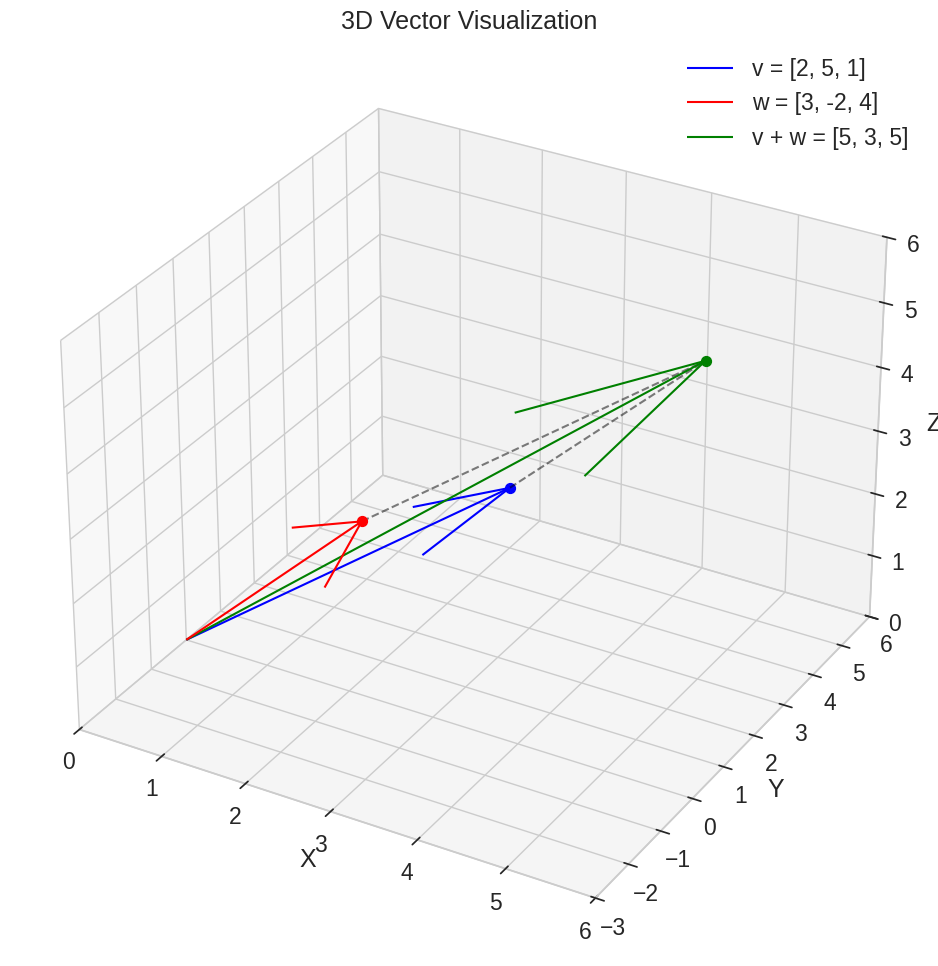

In [ ]:
# Create 3D vectors
v = np.array([2, 5, 1])
w = np.array([3, -2, 4])
sum_vw = v + w

# Create a 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Function to draw a 3D vector from origin
def draw_vector_3d(ax, vector, color='blue', label=None):
    ax.quiver(0, 0, 0, vector[0], vector[1], vector[2], color=color, label=label)
    # Add a point at the tip of the vector
    ax.scatter(vector[0], vector[1], vector[2], color=color, s=50)

# Draw the vectors
draw_vector_3d(ax, v, 'blue', 'v = [2, 5, 1]')
draw_vector_3d(ax, w, 'red', 'w = [3, -2, 4]')
draw_vector_3d(ax, sum_vw, 'green', 'v + w = [5, 3, 5]')

# Add dashed lines to form a parallelogram
ax.plot([v[0], sum_vw[0]], [v[1], sum_vw[1]], [v[2], sum_vw[2]], 'k--', alpha=0.5)
ax.plot([w[0], sum_vw[0]], [w[1], sum_vw[1]], [w[2], sum_vw[2]], 'k--', alpha=0.5)

# Set plot limits and labels
ax.set_xlim([0, 6])
ax.set_ylim([-3, 6])
ax.set_zlim([0, 6])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector Visualization')
ax.legend()

plt.tight_layout()
plt.show()

## 6. ML Application: Text Classification with TF-IDF Vectors

Let's see a real-world application of vectors in natural language processing. We'll convert text documents into TF-IDF vectors, which are commonly used in text classification and search engines.

In [ ]:
# Sample documents
documents = [
    "Machine learning is a subset of artificial intelligence",
    "Neural networks are used in deep learning",
    "Natural language processing is important for text analysis",
    "Python is great for data science and machine learning",
    "Artificial intelligence is changing many industries"
]

# Convert documents to TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert to array for easier manipulation
tfidf_array = tfidf_matrix.toarray()

print("Number of documents:", tfidf_array.shape[0])
print("Vocabulary size (vector dimension):", tfidf_array.shape[1])
print("\nFeature names (first 10):", feature_names[:10])

# Display the TF-IDF vectors for each document
df = pd.DataFrame(tfidf_array, columns=feature_names)
print("\nTF-IDF vectors (sparse representation):")
for i, doc in enumerate(documents):
    # Show only non-zero elements for simplicity
    non_zero_indices = np.where(tfidf_array[i] > 0)[0]
    non_zero_values = {feature_names[idx]: round(tfidf_array[i][idx], 3) for idx in non_zero_indices}
    print(f"Document {i+1}: {doc}")
    print(f"Vector: {non_zero_values}")
    print()

Number of documents: 5
Vocabulary size (vector dimension): 28

Feature names (first 10): ['analysis' 'and' 'are' 'artificial' 'changing' 'data' 'deep' 'for'
 'great' 'important']

TF-IDF vectors (sparse representation):
Document 1: Machine learning is a subset of artificial intelligence
Vector: {'artificial': 0.371, 'intelligence': 0.371, 'is': 0.259, 'learning': 0.308, 'machine': 0.371, 'of': 0.46, 'subset': 0.46}

Document 2: Neural networks are used in deep learning
Vector: {'are': 0.394, 'deep': 0.394, 'in': 0.394, 'learning': 0.264, 'networks': 0.394, 'neural': 0.394, 'used': 0.394}

Document 3: Natural language processing is important for text analysis
Vector: {'analysis': 0.379, 'for': 0.306, 'important': 0.379, 'is': 0.213, 'language': 0.379, 'natural': 0.379, 'processing': 0.379, 'text': 0.379}

Document 4: Python is great for data science and machine learning
Vector: {'and': 0.376, 'data': 0.376, 'for': 0.303, 'great': 0.376, 'is': 0.212, 'learning': 0.252, 'machine': 0.303, 

### Document Similarity using Vector Operations

Now let's compute the similarity between documents using their TF-IDF vector representations.

In [ ]:
# Compute cosine similarity between all document pairs
similarity_matrix = cosine_similarity(tfidf_matrix)

# Create a dataframe for better visualization
similarity_df = pd.DataFrame(similarity_matrix,
                            index=[f"Doc {i+1}" for i in range(len(documents))],
                            columns=[f"Doc {i+1}" for i in range(len(documents))])
print("Cosine Similarity Matrix:")
similarity_df

Cosine Similarity Matrix:


,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5
Doc 1,1.000000,0.081309,0.055352,0.245340,0.346828
Doc 2,0.081309,1.000000,0.000000,0.066436,0.000000
Doc 3,0.055352,0.000000,1.000000,0.137979,0.055945
Doc 4,0.245340,0.066436,0.137979,1.000000,0.055550
Doc 5,0.346828,0.000000,0.055945,0.055550,1.000000


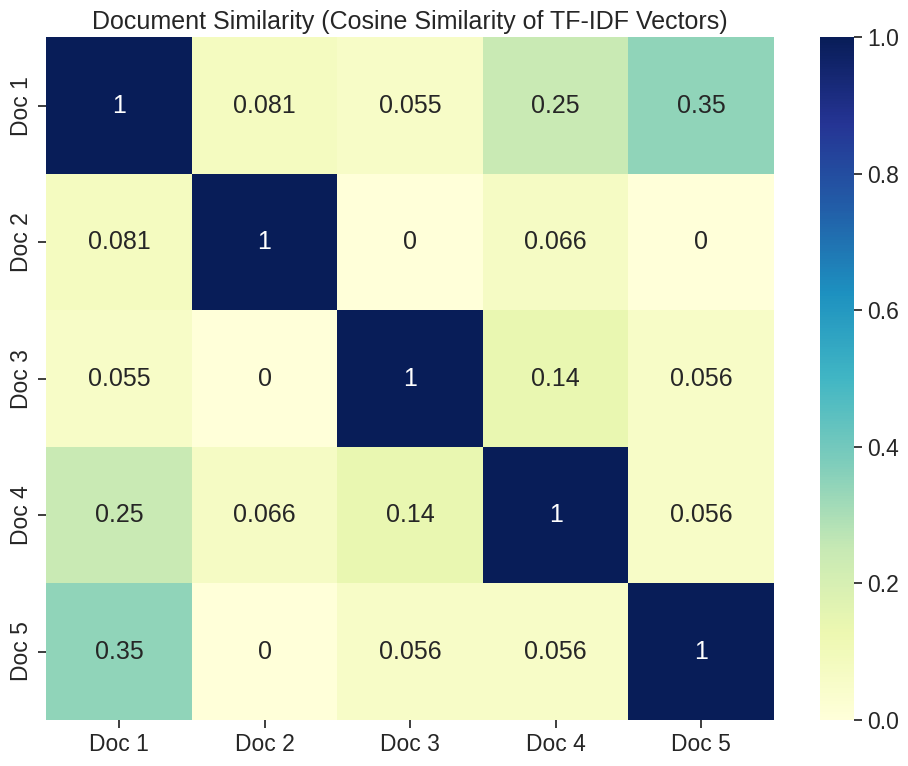

The most similar documents are Document 1 and Document 5
Similarity score: 0.347
Document 1: Machine learning is a subset of artificial intelligence
Document 5: Artificial intelligence is changing many industries


In [ ]:
# Visualize the similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, cmap='YlGnBu', vmin=0, vmax=1)
plt.title('Document Similarity (Cosine Similarity of TF-IDF Vectors)')
plt.tight_layout()
plt.show()

# Find the most similar document pair
# Exclude diagonal (self-similarity) by setting it to -1
similarity_matrix_no_diag = similarity_matrix.copy()
np.fill_diagonal(similarity_matrix_no_diag, -1)
i, j = np.unravel_index(similarity_matrix_no_diag.argmax(), similarity_matrix_no_diag.shape)
print(f"The most similar documents are Document {i+1} and Document {j+1}")
print(f"Similarity score: {similarity_matrix[i, j]:.3f}")
print(f"Document {i+1}: {documents[i]}")
print(f"Document {j+1}: {documents[j]}")

### Interactive Document Similarity

Let's create a more interactive example where you can input your own text and see similarity with existing documents.

In [ ]:
# Define a new query document
query = "Deep learning models use artificial neural networks"

# Transform the query into TF-IDF vector space
query_vector = vectorizer.transform([query])

# Compute similarity between query and all documents
query_similarity = cosine_similarity(query_vector, tfidf_matrix).flatten()

# Display results
print(f"Query: '{query}'\n")
print("Similarity with existing documents:")
for i, score in enumerate(query_similarity):
    print(f"Document {i+1}: {score:.3f} - '{documents[i]}'")

# Find the most similar document
most_similar_idx = query_similarity.argmax()
print(f"\nMost similar document: Document {most_similar_idx+1}")
print(f"Similarity score: {query_similarity[most_similar_idx]:.3f}")
print(f"Document: '{documents[most_similar_idx]}'")

Query: 'Deep learning models use artificial neural networks'

Similarity with existing documents:
Document 1: 0.250 - 'Machine learning is a subset of artificial intelligence'
Document 2: 0.671 - 'Neural networks are used in deep learning'
Document 3: 0.000 - 'Natural language processing is important for text analysis'
Document 4: 0.083 - 'Python is great for data science and machine learning'
Document 5: 0.150 - 'Artificial intelligence is changing many industries'

Most similar document: Document 2
Similarity score: 0.671
Document: 'Neural networks are used in deep learning'


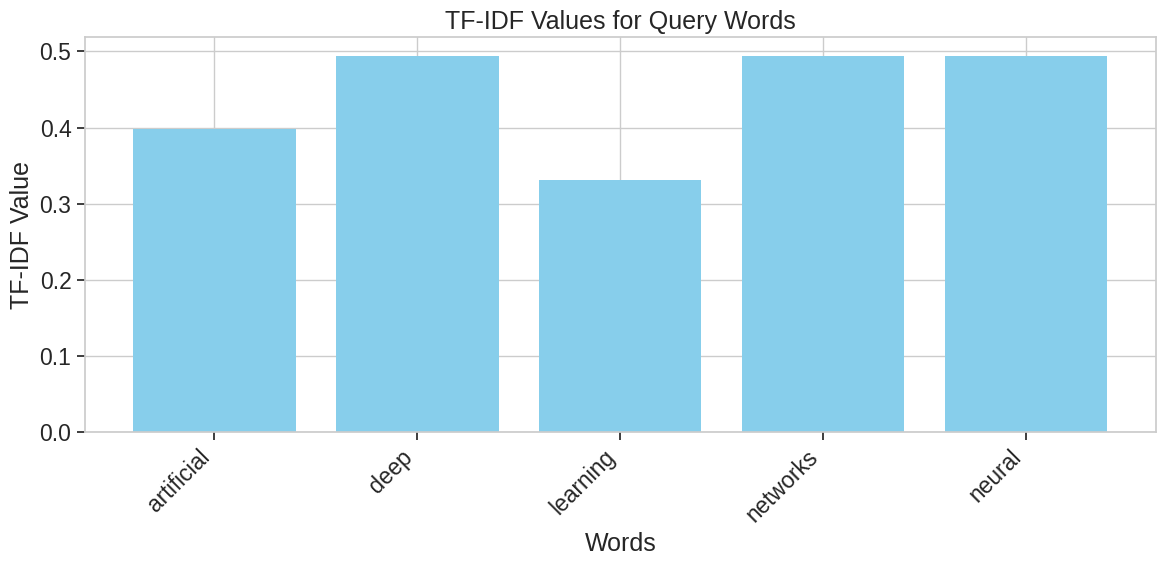

In [ ]:
# Let's visualize the TF-IDF values of our query
query_array = query_vector.toarray()[0]
query_words = [feature_names[idx] for idx in np.where(query_array > 0)[0]]
query_values = [query_array[idx] for idx in np.where(query_array > 0)[0]]

# Visualize as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(query_words, query_values, color='skyblue')
plt.xlabel('Words')
plt.ylabel('TF-IDF Value')
plt.title('TF-IDF Values for Query Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 7. ML Application: Movie Recommendation with Vector Similarity

Let's implement a simple movie recommendation system using vector similarity, as discussed in our class example.

In [ ]:
# Define movies with feature vectors [action, romance, comedy, drama, scifi]
movies = {
    'The Avengers': [9, 3, 6, 4, 8],
    'The Notebook': [2, 9, 3, 8, 1],
    'Deadpool': [8, 4, 9, 2, 6],
    'The Shawshank Redemption': [3, 2, 1, 9, 2],
    'Interstellar': [6, 5, 2, 7, 9],
    'La La Land': [1, 8, 4, 7, 1],
    'The Dark Knight': [8, 3, 2, 8, 5],
    'Bridesmaids': [3, 5, 9, 4, 1],
    'The Exorcist': [7, 1, 1, 6, 4],
    'Toy Story': [4, 3, 8, 5, 4]
}

# Convert to a DataFrame for better visualization
movies_df = pd.DataFrame.from_dict(movies, orient='index', columns=['Action', 'Romance', 'Comedy', 'Drama', 'Sci-Fi'])
movies_df

,Action,Romance,Comedy,Drama,Sci-Fi
The Avengers,9,3,6,4,8
The Notebook,2,9,3,8,1
Deadpool,8,4,9,2,6
The Shawshank Redemption,3,2,1,9,2
Interstellar,6,5,2,7,9
La La Land,1,8,4,7,1
The Dark Knight,8,3,2,8,5
Bridesmaids,3,5,9,4,1
The Exorcist,7,1,1,6,4
Toy Story,4,3,8,5,4


<Figure size 1400x800 with 0 Axes>

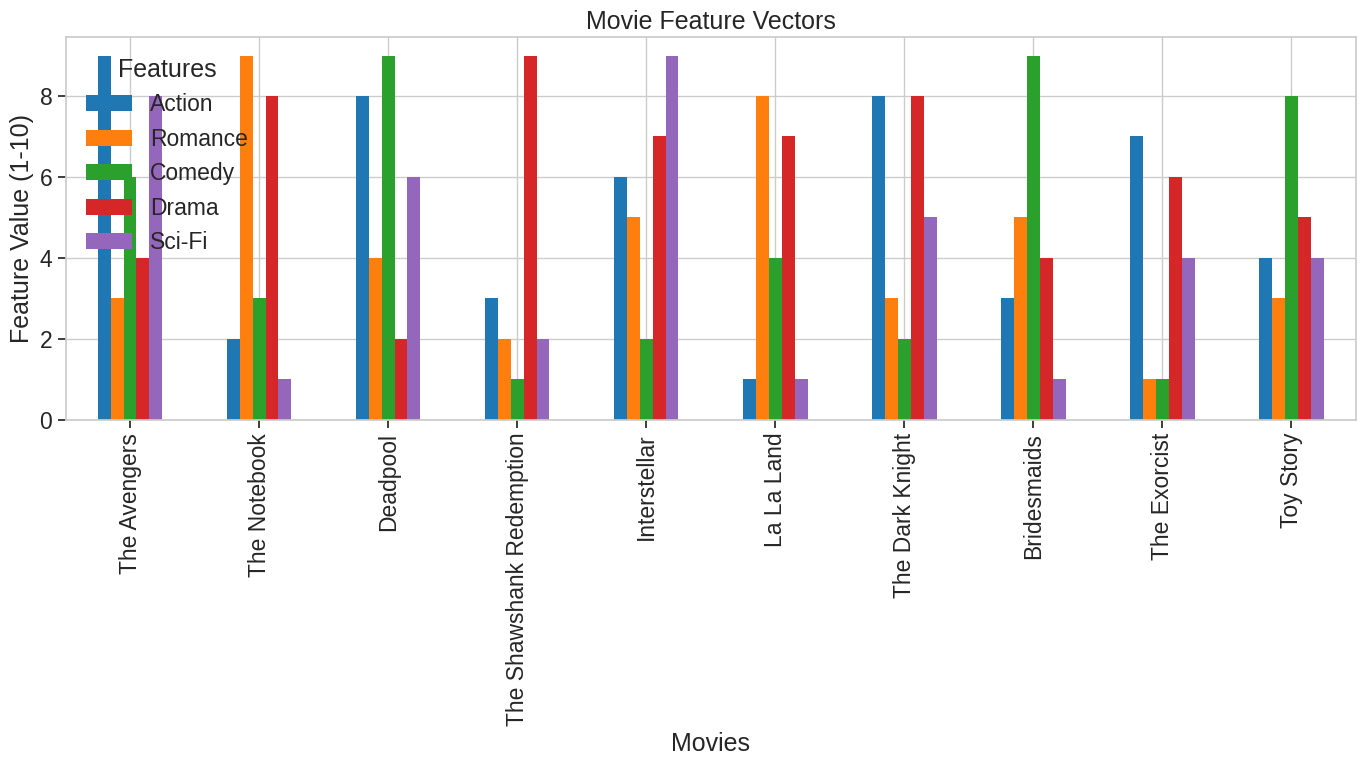

In [ ]:
# Visualize the movie feature vectors
plt.figure(figsize=(14, 8))
movies_df.plot(kind='bar', figsize=(14, 8))
plt.title('Movie Feature Vectors')
plt.ylabel('Feature Value (1-10)')
plt.xlabel('Movies')
plt.legend(title='Features')
plt.tight_layout()
plt.show()

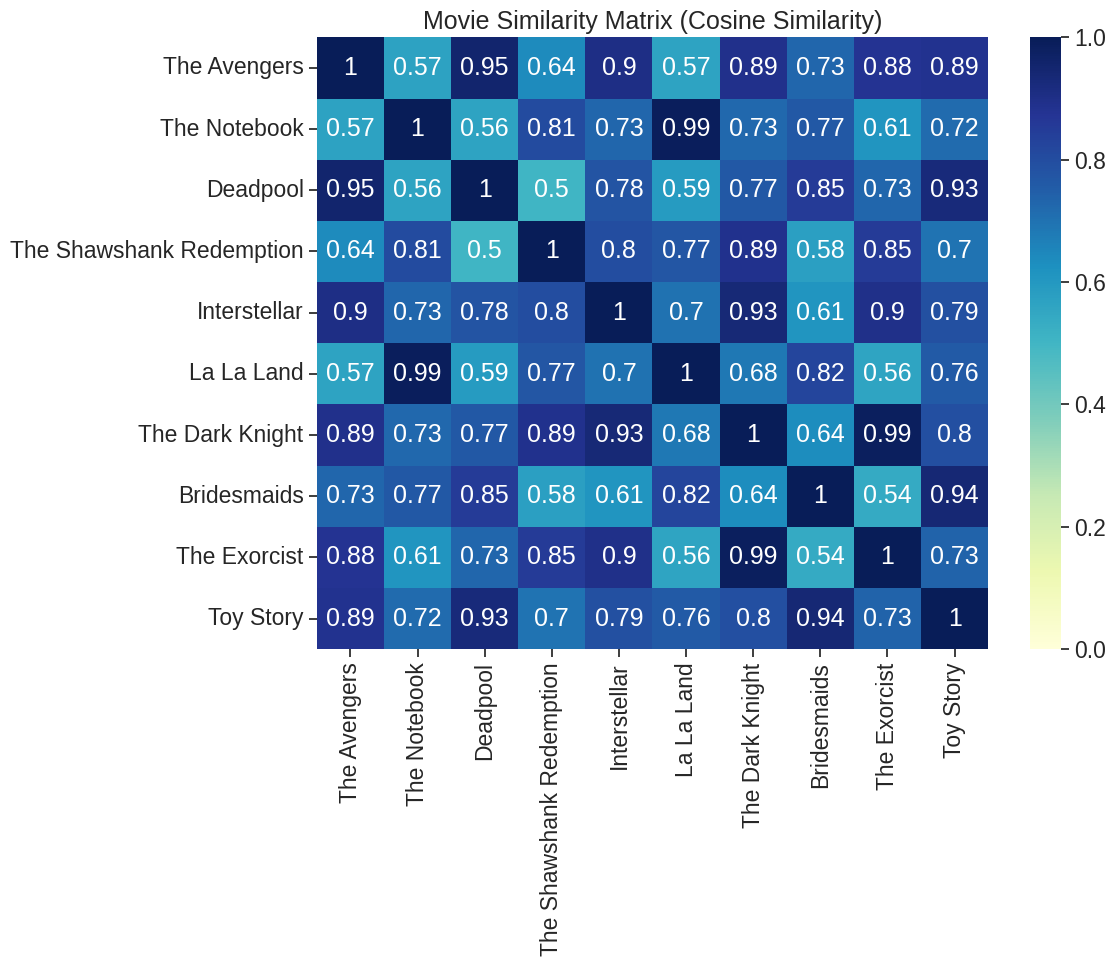

In [ ]:
# Convert to a numpy array for calculations
movie_names = list(movies.keys())
movie_vectors = np.array(list(movies.values()))

# Compute the similarity matrix
movie_similarity = cosine_similarity(movie_vectors)

# Create a dataframe for the similarity matrix
movie_similarity_df = pd.DataFrame(movie_similarity, index=movie_names, columns=movie_names)

# Visualize as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(movie_similarity_df, annot=True, cmap='YlGnBu', vmin=0, vmax=1)
plt.title('Movie Similarity Matrix (Cosine Similarity)')
plt.tight_layout()
plt.show()

### Movie Recommendation Based on User Preferences

Now let's recommend movies based on user preference vectors.

In [ ]:
# Define user preference vectors [action, romance, comedy, drama, scifi]
users = {
    'User 1': [8, 2, 7, 3, 9],  # Action and sci-fi fan
    'User 2': [3, 9, 2, 8, 1],  # Romance and drama fan
    'User 3': [5, 5, 8, 4, 3]   # Comedy fan with balanced interests
}

# Function to recommend movies for a user
def recommend_movies(user_vector, movie_vectors, movie_names, top_n=3):
    # Compute similarity between user vector and all movie vectors
    similarities = cosine_similarity([user_vector], movie_vectors)[0]

    # Get the indices of the top N similar movies
    top_indices = np.argsort(similarities)[-top_n:][::-1]

    # Return the names and similarity scores of the top movies
    return [(movie_names[i], similarities[i]) for i in top_indices]

# Get recommendations for each user
for user_name, user_vector in users.items():
    recommendations = recommend_movies(user_vector, movie_vectors, movie_names)

    print(f"Recommendations for {user_name} (preferences: {user_vector}):")
    for movie, score in recommendations:
        print(f"  {movie}: Similarity Score = {score:.3f}")
    print()

Recommendations for User 1 (preferences: [8, 2, 7, 3, 9]):
  The Avengers: Similarity Score = 0.988
  Deadpool: Similarity Score = 0.956
  Toy Story: Similarity Score = 0.884

Recommendations for User 2 (preferences: [3, 9, 2, 8, 1]):
  The Notebook: Similarity Score = 0.994
  La La Land: Similarity Score = 0.970
  The Shawshank Redemption: Similarity Score = 0.821

Recommendations for User 3 (preferences: [5, 5, 8, 4, 3]):
  Toy Story: Similarity Score = 0.975
  Bridesmaids: Similarity Score = 0.967
  Deadpool: Similarity Score = 0.945



### Interactive Movie Recommendation

Let's create an interactive function that allows us to input custom preference vectors and get recommendations.

Recommendations for preference vector [5, 5, 8, 6, 7]:
  Toy Story: Similarity Score = 0.976
  Deadpool: Similarity Score = 0.930
  The Avengers: Similarity Score = 0.929


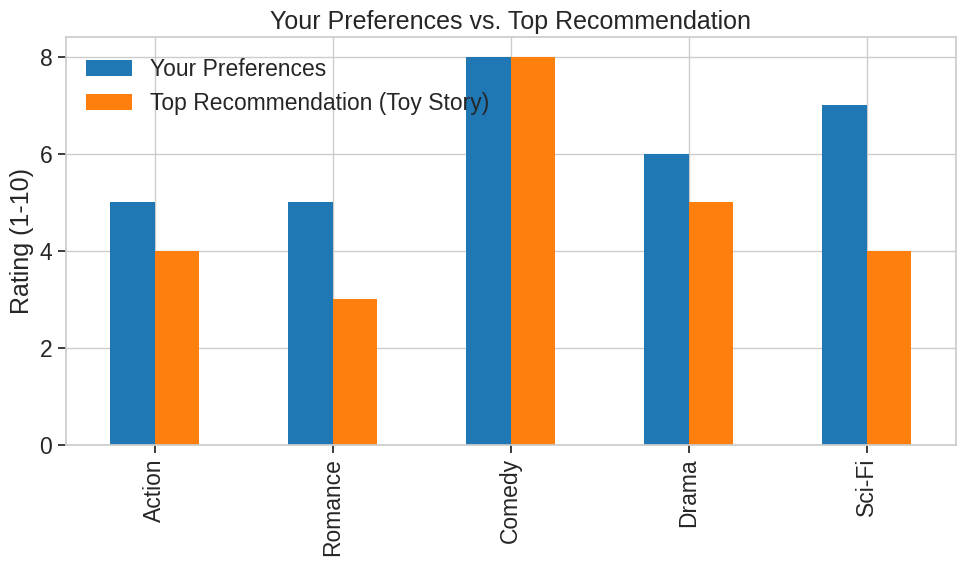

[('Toy Story', 0.9761160145740883),
 ('Deadpool', 0.9300116252179732),
 ('The Avengers', 0.9285337648314482)]

In [ ]:
def interactive_recommendation(action, romance, comedy, drama, scifi, top_n=3):
    """Get movie recommendations based on custom preference values."""
    # Create user vector
    user_vector = [action, romance, comedy, drama, scifi]

    # Get recommendations
    recommendations = recommend_movies(user_vector, movie_vectors, movie_names, top_n)

    print(f"Recommendations for preference vector {user_vector}:")
    for movie, score in recommendations:
        print(f"  {movie}: Similarity Score = {score:.3f}")

    # Display user preferences and top movie as a bar chart
    top_movie = recommendations[0][0]
    top_movie_vector = movies[top_movie]

    # Create comparison DataFrame
    comparison = pd.DataFrame({
        'Your Preferences': user_vector,
        f'Top Recommendation ({top_movie})': top_movie_vector
    }, index=['Action', 'Romance', 'Comedy', 'Drama', 'Sci-Fi'])

    # Visualize
    comparison.plot(kind='bar', figsize=(10, 6))
    plt.title('Your Preferences vs. Top Recommendation')
    plt.ylabel('Rating (1-10)')
    plt.tight_layout()
    plt.show()

    return recommendations

# Example: A balanced viewer who enjoys comedy and sci-fi
interactive_recommendation(action=5, romance=5, comedy=8, drama=6, scifi=7)

## 8. Practice Problems for Students

Let's create some practice problems for students to test their understanding of vectors in Python and machine learning.

### Problem 1: Image Feature Vectors

In this problem, you'll work with simplified image feature vectors. Each vector represents the RGB color distribution of an image with dimensions [red_intensity, green_intensity, blue_intensity].

**Tasks:**
1. Create a function to compute the Euclidean distance between two color vectors
2. Find the most similar image to a given reference image
3. Create a visualization of the similarity between images

In [ ]:
# Image dataset with RGB feature vectors [red, green, blue]
images = {
    'sunset.jpg': [0.8, 0.4, 0.2],
    'ocean.jpg': [0.2, 0.3, 0.8],
    'forest.jpg': [0.3, 0.7, 0.2],
    'desert.jpg': [0.9, 0.8, 0.3],
    'mountain.jpg': [0.5, 0.5, 0.7],
    'flower.jpg': [0.7, 0.2, 0.5],
    'snow.jpg': [0.9, 0.9, 0.9],
    'night.jpg': [0.1, 0.1, 0.3]
}

# Convert to numpy arrays
image_names = list(images.keys())
image_vectors = np.array(list(images.values()))

# TODO: Complete the function to compute Euclidean distance between two vectors
def color_distance(vector1, vector2):
    """Compute the Euclidean distance between two color vectors."""
    # Your code here
    pass

# TODO: Find the most similar image to a reference image
def find_similar_images(reference_image, all_images, all_names, top_n=3):
    """Find the top N most similar images to the reference image."""
    # Your code here
    pass

# TODO: Visualize the similarity between images
def visualize_similarities():
    """Create a visualization of image similarities."""
    # Your code here
    pass

# Tests for your implementations
# For example:
ref_image = 'ocean.jpg'
ref_vector = images[ref_image]
print(f"Reference image: {ref_image}, Vector: {ref_vector}")

# Your function calls to test your implementation
# find_similar_images(...)
# visualize_similarities()

# Sample Solution (uncomment to check your work)
"""
def color_distance(vector1, vector2):
    return np.linalg.norm(np.array(vector1) - np.array(vector2))

def find_similar_images(reference_image, all_images, all_names, top_n=3):
    distances = []
    ref_vector = all_images[all_names.index(reference_image)]

    for i, image_vector in enumerate(all_images):
        if all_names[i] != reference_image:  # Skip the reference image itself
            dist = color_distance(ref_vector, image_vector)
            distances.append((all_names[i], dist))

    # Sort by distance (smaller is more similar)
    sorted_distances = sorted(distances, key=lambda x: x[1])
    return sorted_distances[:top_n]

# Test the function
similar_images = find_similar_images('ocean.jpg', image_vectors, image_names)
print("Most similar images to ocean.jpg:")
for img, dist in similar_images:
    print(f"  {img}: Distance = {dist:.3f}")

def visualize_similarities():
    similarity_matrix = np.zeros((len(image_names), len(image_names)))

    for i, img1 in enumerate(image_names):
        for j, img2 in enumerate(image_names):
            # Use 1 - normalized_distance as similarity (closer to 1 means more similar)
            dist = color_distance(image_vectors[i], image_vectors[j])
            max_possible_dist = np.sqrt(3)  # Max distance in RGB space [0-1]
            similarity = 1 - (dist / max_possible_dist)
            similarity_matrix[i, j] = similarity

    # Visualize as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, annot=True, cmap='YlGnBu',
                xticklabels=image_names, yticklabels=image_names)
    plt.title('Image Similarity Matrix')
    plt.tight_layout()
    plt.show()

visualize_similarities()
"""


Reference image: ocean.jpg, Vector: [0.2, 0.3, 0.8]


'\ndef color_distance(vector1, vector2):\n    return np.linalg.norm(np.array(vector1) - np.array(vector2))\n\ndef find_similar_images(reference_image, all_images, all_names, top_n=3):\n    distances = []\n    ref_vector = all_images[all_names.index(reference_image)]\n    \n    for i, image_vector in enumerate(all_images):\n        if all_names[i] != reference_image:  # Skip the reference image itself\n            dist = color_distance(ref_vector, image_vector)\n            distances.append((all_names[i], dist))\n    \n    # Sort by distance (smaller is more similar)\n    sorted_distances = sorted(distances, key=lambda x: x[1])\n    return sorted_distances[:top_n]\n\n# Test the function\nsimilar_images = find_similar_images(\'ocean.jpg\', image_vectors, image_names)\nprint("Most similar images to ocean.jpg:")\nfor img, dist in similar_images:\n    print(f"  {img}: Distance = {dist:.3f}")\n\ndef visualize_similarities():\n    similarity_matrix = np.zeros((len(image_names), len(image_name

### Problem 2: Spam Detection with Vector Similarity

In this problem, you'll implement a simple spam detector using vector similarity between documents.

**Tasks:**
1. Convert emails to TF-IDF vectors
2. Train a simple classifier based on similarity to known spam and ham (non-spam) patterns
3. Evaluate the classifier on new emails

In [ ]:
# Training data: Sample emails with labels
emails_train = [
    "Get rich quick with this amazing investment opportunity!",
    "Congratulations! You've won a free cruise vacation.",
    "Meeting scheduled for tomorrow at 2 PM in the conference room.",
    "Click here to claim your prize now! Limited time offer!",
    "Please review the quarterly report I attached to this email.",
    "Your password has been reset. Click here to verify.",
    "Free enlargement pills! 100% guaranteed results!",
    "Can we reschedule our meeting for next Monday?",
    "Urgent: Your account has been suspended. Verify now!",
    "The project deadline has been extended to next Friday."
]

# Labels: 1 for spam, 0 for ham (non-spam)
labels_train = [1, 1, 0, 1, 0, 1, 1, 0, 1, 0]

# Test data for evaluation
emails_test = [
    "Amazing deal! Buy now and save 80%!",
    "Please send me the minutes from yesterday's meeting.",
    "Your application has been approved. Congratulations!",
    "Looking forward to seeing you at the conference next week."
]

# TODO: Implement the TF-IDF vectorization of emails
def vectorize_emails(emails_train, emails_test):
    """Convert emails to TF-IDF vectors."""
    # Your code here
    pass

# TODO: Implement the spam classifier based on similarity
def classify_email(email_vector, train_vectors, train_labels, threshold=0.3):
    """Classify an email as spam or ham based on similarity to training data."""
    # Your code here
    pass

# TODO: Implement the function to evaluate the classifier
def evaluate_classifier(test_vectors, train_vectors, train_labels):
    """Evaluate the classifier on test emails."""
    # Your code here
    pass

# Test your implementation
# vectorize_emails(...)
# evaluate_classifier(...)

# Sample Solution (uncomment to check your work)
"""
def vectorize_emails(emails_train, emails_test):
    vectorizer = TfidfVectorizer(stop_words='english')
    # Fit on training data and transform both training and test data
    train_vectors = vectorizer.fit_transform(emails_train)
    test_vectors = vectorizer.transform(emails_test)
    return train_vectors, test_vectors, vectorizer

def classify_email(email_vector, train_vectors, train_labels, threshold=0.3):
    # Compute similarity between email and all training examples
    similarities = cosine_similarity(email_vector, train_vectors).flatten()

    # Compute average similarity to spam and ham
    spam_indices = [i for i, label in enumerate(train_labels) if label == 1]
    ham_indices = [i for i, label in enumerate(train_labels) if label == 0]

    avg_spam_similarity = np.mean(similarities[spam_indices])
    avg_ham_similarity = np.mean(similarities[ham_indices])

    # Classify as spam if similarity to spam is higher by at least threshold
    is_spam = avg_spam_similarity > avg_ham_similarity + threshold
    confidence = abs(avg_spam_similarity - avg_ham_similarity)

    return 1 if is_spam else 0, confidence

def evaluate_classifier(test_vectors, train_vectors, train_labels):
    results = []

    for i, email_vector in enumerate(test_vectors):
        label, confidence = classify_email(email_vector, train_vectors, train_labels)
        results.append((emails_test[i], label, confidence))

    return results

# Run the solution
train_vectors, test_vectors, vectorizer = vectorize_emails(emails_train, emails_test)
results = evaluate_classifier(test_vectors, train_vectors, labels_train)

# Display results
print("Classification Results:")
for email, label, confidence in results:
    print(f"Email: '{email[:50]}...'")
    print(f"Classification: {'Spam' if label == 1 else 'Ham (Not Spam)'}")
    print(f"Confidence: {confidence:.3f}\n")

# Visualize top terms for spam and ham
feature_names = vectorizer.get_feature_names_out()
spam_vectors = train_vectors[np.array(labels_train) == 1].toarray()
ham_vectors = train_vectors[np.array(labels_train) == 0].toarray()

spam_importance = np.mean(spam_vectors, axis=0)
ham_importance = np.mean(ham_vectors, axis=0)

# Get top 10 terms for each class
spam_top_indices = np.argsort(spam_importance)[-10:]
ham_top_indices = np.argsort(ham_importance)[-10:]

# Create a DataFrame for visualization
top_terms_df = pd.DataFrame({
    'Spam Terms': [feature_names[i] for i in spam_top_indices],
    'Spam Importance': spam_importance[spam_top_indices],
    'Ham Terms': [feature_names[i] for i in ham_top_indices],
    'Ham Importance': ham_importance[ham_top_indices]
})

# Plot the top terms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.barh(top_terms_df['Spam Terms'], top_terms_df['Spam Importance'], color='red')
ax1.set_title('Top Terms in Spam Emails')
ax1.set_xlabel('Importance')

ax2.barh(top_terms_df['Ham Terms'], top_terms_df['Ham Importance'], color='green')
ax2.set_title('Top Terms in Ham Emails')
ax2.set_xlabel('Importance')

plt.tight_layout()
plt.show()
"""


'\ndef vectorize_emails(emails_train, emails_test):\n    vectorizer = TfidfVectorizer(stop_words=\'english\')\n    # Fit on training data and transform both training and test data\n    train_vectors = vectorizer.fit_transform(emails_train)\n    test_vectors = vectorizer.transform(emails_test)\n    return train_vectors, test_vectors, vectorizer\n\ndef classify_email(email_vector, train_vectors, train_labels, threshold=0.3):\n    # Compute similarity between email and all training examples\n    similarities = cosine_similarity(email_vector, train_vectors).flatten()\n    \n    # Compute average similarity to spam and ham\n    spam_indices = [i for i, label in enumerate(train_labels) if label == 1]\n    ham_indices = [i for i, label in enumerate(train_labels) if label == 0]\n    \n    avg_spam_similarity = np.mean(similarities[spam_indices])\n    avg_ham_similarity = np.mean(similarities[ham_indices])\n    \n    # Classify as spam if similarity to spam is higher by at least threshold\n    

## Conclusion

In this notebook, we've explored the fundamentals of vectors in Python and their applications in machine learning:

1. Creating and manipulating vectors using NumPy
2. Basic vector operations: addition, scalar multiplication, subtraction
3. Dot products and vector similarity
4. Vector norms and normalization
5. Visualization of vectors in 2D and 3D
6. Real-world ML applications: text classification with TF-IDF vectors
7. Simple recommendation system using vector similarity
8. Practice problems to reinforce your understanding

Understanding vectors is crucial for machine learning, as they form the foundation of data representation, feature engineering, and model algorithms. The concepts we've covered here will help you build intuition for more complex ML topics like matrix operations, neural networks, and dimensionality reduction.